# Evaluación Módulo 3

### Exploración, limpieza y visualización de los datos de clientes de una aerolínea


## 3. LIMPIEZA DE DATOS DEL DATAFRAME RESULTANTE

Una vez revisados y unidos los 2 archivos iniciales ("Customer Flight Activity.csv" y "Customer Loyalty History.csv"), en este documento se revisará el archivo "Customer Complete Information.csv", donde podemos enconetrar toda la información sobre vuelos e historial de lealtad con la compañía de los clientes canadienses 

In [1]:
# importo las librerías que necesitaré

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización de datos en gráficas
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("files/Customer Complete Information.csv", index_col=0)

df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,66888.21,Single,Nova,2887.74,Standard,2013,3,NaN,NaN


In [3]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 403760, y el número de columnas es 24


In [4]:
df.info()
# los datos están en el tipo de dato correcto para cada columna

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 403759
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Province                     403760 non-null  object 
 11  City                         403760 non-null  object 
 12  Postal Code                  403760 non-null  object 
 13  Gend

In [5]:
round(df.isna().sum()/df.shape[0]*100, 10)
# solo tengo valores nulos en las columnas 'Cancellation Year' y 'Cancellation Month'

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                          0.000000
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
dtype: float64

In [6]:
df.duplicated().sum()
# no hay filas duplicadas

np.int64(0)

In [7]:
df.describe().T
# me llama la atención:
# - 'Flights Booked': la mediana (50%) es 1 por lo que la mayoría de los datos están concentrados en valores bajos (50% es 0 y el otro 50% está entre 1 y 21 vuelos). Ver histograma
# - 'Flights with Companions': el Q3 (75%) es 1 por lo que la mayoría de los datos están concentrados en valores bajos (75% es 0 y el otro 25% está entre 1 y 11 vuelos). Ver histograma
# - 'Total Flights': la mediana (50%) es 1 por lo que la mayoría de los datos están concentrados en valores bajos (50% es 0 y el otro 50% está entre 1 y 32 vuelos). Ver histograma
# - 'Distance' y 'Points Accumulated' tienen una clara relación: a más distancia, más puntos acumulados. Ver scatterplot
# - recordar que la mediana (50%) de 'Salary' es un dato que he sacado yo (66888.21 para 'College')
# - las columnas "Cancellation Year" y "Cancellation Month" aparecen como float y tiene un 87.70% de nulos

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


In [8]:
df.describe(include="O").T
# me llama la atención:
# - 'Ontario' es el valor que más sale, la moda, en la columna "Province" y es casi un tercio (32,26%) (recordar que son todos clientes de Canadá)
# - 'Toronto' es la moda, en la columna "City", y es un quinto (20,00%)
# - 'Female' es la moda, en la columna "Gender" (solo son Female y Male), y es un poco más de la mitad (50,22%)
# - 'Bachelor' es la moda en la columna "Education", es casi dos tercios de los datos (62,55%)
# - 'Married' es la moda en "Marital Status", es más de la mitad (58,17%)
# - 'Star' es la moda en "Loyalty Card", está cerca de la mitad de los datos (45,51%)
# - 'Standard' es la moda en "Enrollment Type", casi la totalidad de los datos (94,22%)

,count,unique,top,freq
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [9]:
(df['Enrollment Type'].value_counts(normalize=True).iloc[0]) * 100

np.float64(94.2190905488409)

## 4. VISUALIZACIÓN DE DATOS

Tomando el dataframe (df) del archivo "Customer Complete Information.csv" y usando las herramientas de visualización aprendidas durante este módulo 3, contesta a las siguientes
preguntas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [10]:
# necesitaré las columnas "Flights Booked", "Month" y "Year"
df_vuelos_mes_año = df.groupby(['Year', 'Month'])['Flights Booked'].count().reset_index()
df_vuelos_mes_año

,Year,Month,Flights Booked
0,2017,1,16797
1,2017,2,16800
2,2017,3,16807
3,2017,4,16807
4,2017,5,16811
5,2017,6,16814
6,2017,7,16812
7,2017,8,16817
8,2017,9,16814
9,2017,10,16817


Text(0.5, 1.0, 'Distribución de vuelos reservados por mes entre 2017 y 2018')

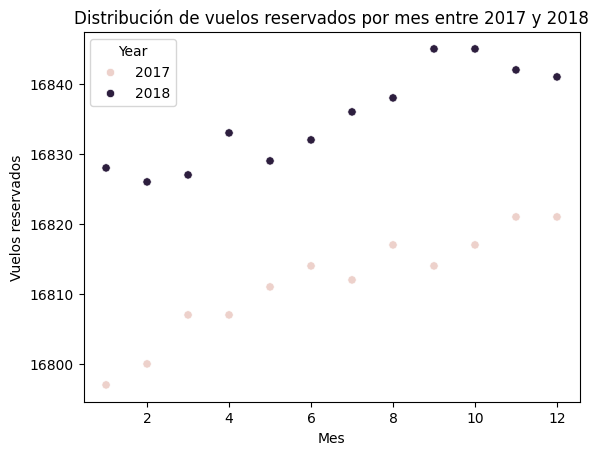

In [11]:
# se ve un crecimiento de vuelos mensual
# las visualizo con un Scatterplot:
sns.scatterplot(data=df_vuelos_mes_año, x='Month', y='Flights Booked', hue='Year')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de vuelos reservados por mes entre 2017 y 2018', fontsize=12)

In [12]:
# Realizo una prueba de normalidad (usando la prueba de Shapiro-Wilk)
p_value = shapiro(df_vuelos_mes_año['Flights Booked']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos se ajustan a una distribución normal (p-value = 0.5756098691304692 )


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Este gráfico Scatterplot muestra el número de vuelos reservados por mes, agrupados por año (en 2017 y 2018) y parece bastante uniforme. Los datos son similares mes a mes (con una variación en aumento de unos 7 vuelos como mucho entre meses), por lo que se confirma un aumento de reservas entre enero y diciembre, en ambos años (cada mes reservan más vuelos), lo que sugiere una distribución en crecimiento constante. Viendo la Prueba de Shapiro-Wilk veo que hay una distribución normal.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [13]:
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,66888.21,Single,Nova,2887.74,Standard,2013,3,NaN,NaN


In [14]:
# necesitaré las columnas "Distance" y "Points Accumulated":
df[['Distance', 'Points Accumulated']].corr(numeric_only=True)

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


Text(0.5, 1.0, 'Correlación positiva entre distancia de vuelo y puntos acumulados por vuelo')

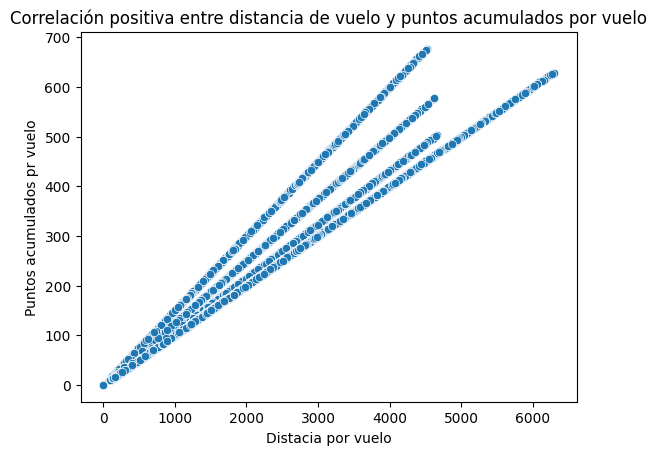

In [15]:
# hay una clarísima correlación entre estas columnas (0,995)
# las visualizo con un Scatterplot:
sns.scatterplot(data=df, x='Distance', y='Points Accumulated')
plt.xlabel('Distacia por vuelo')
plt.ylabel('Puntos acumulados pr vuelo')
plt.title('Correlación positiva entre distancia de vuelo y puntos acumulados por vuelo', fontsize=12)

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Este gráfico Scatterplot muestra la correlación positiva muy alta (0,995) que existe entre la distancia de vuelo y los puntos acumulados por vuelo, y es una relación uniforme y constante, en la que a mayor distancia se consiguen más puntos acumulados.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [16]:
# necesitaré la columna "Province": 
df_clientes_provincia = df['Province'].value_counts()
df_clientes_provincia

Province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64

In [17]:
# porcentaje de los clientes por provincia:
df_porcentaje_clientes_provincia = round(df['Province'].value_counts(normalize=True) * 100, 2)
df_porcentaje_clientes_provincia

Province
Ontario                 32.26
British Columbia        26.36
Quebec                  19.71
Alberta                  5.79
Manitoba                 3.94
New Brunswick            3.80
Nova Scotia              3.10
Saskatchewan             2.44
Newfoundland             1.55
Yukon                    0.66
Prince Edward Island     0.39
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribución de clientes por provincia canadiense')

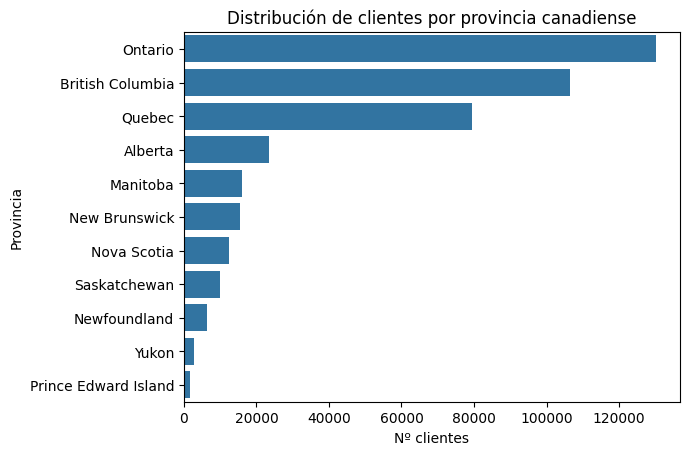

In [18]:
# para visualizarlo mejor voy a usar un Countplot:
sns.countplot(data=df, y='Province', order=['Ontario', 'British Columbia', 'Quebec', 'Alberta', 'Manitoba', 'New Brunswick', 'Nova Scotia', 'Saskatchewan', 'Newfoundland', 'Yukon', 'Prince Edward Island'])
plt.xlabel("Nº clientes")
plt.ylabel("Provincia")
plt.title('Distribución de clientes por provincia canadiense', fontsize=12)

3. ¿Cuál es la distribución de los clientes por provincia o estado?

En el Countplot veo una distribución desigual en la que las 3 primeras provincias ('Ontario', 'British Columbia', 'Quebec') tienen la mayor parte de clientes (78,33%) pues son provincias en las que vive una mayor parte de la población de Canadá, mientras que las últimas ('Yukon', 'Prince Edward Island') no tienen casi representación (1,05%), pues son zonas prácticamente deshabitadas. Veo una distribución desigual y, aunque no puedo comprobar con la prueba de Shapiro-Wilk o la prueba de Kolmogorov si es normal o no (debido a que no le puedo pasar datos categóricos), claramente no es una distribución normal: no es simétrica, no tiene forma de campana, los datos no se agrupan alrededor de la media ni disminuyen hacia los extremos.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [19]:
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,66888.21,Single,Nova,2887.74,Standard,2013,3,NaN,NaN


In [20]:
# necesitaré las columnas "Education" y "Salary":
# para comparar los salarios medios según educación saco las medias del salario de cada nivel de estudios:
round(df.groupby('Education')['Salary'].mean(), 2)

Education
Bachelor                 72599.08
College                  66888.21
Doctor                  178403.68
High School or Below     61146.38
Master                  103734.52
Name: Salary, dtype: float64

In [21]:
# Voy a verlo en un Barplot:
# quiero que salgan en orden educativo de menor a mayor:
orden_educativo = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

salario_educacion = round(df.groupby('Education')['Salary'].mean(), 2)
salario_educacion =salario_educacion.reset_index()

In [22]:
salario_educacion

,Education,Salary
0,Bachelor,72599.08
1,College,66888.21
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


Text(0.5, 1.0, 'Distribución del salario de los clientes por educación')

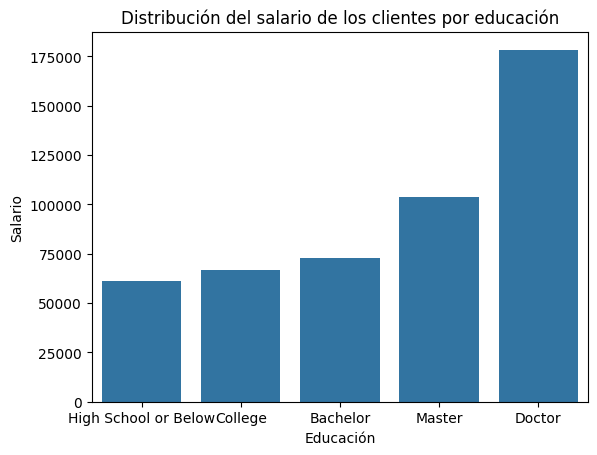

In [23]:
# Visualización con el Barplot:
sns.barplot(data=salario_educacion, x='Education', y='Salary', order=orden_educativo)
plt.xlabel("Educación")
plt.ylabel("Salario")
plt.title('Distribución del salario de los clientes por educación', fontsize=12)

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Lo primero recordar que los datos de 'College' aparecían vacíos (todos sus datos eran nulos). Debido a que la educación de 'College' está situada entre 'High School or Below' y 'Bachelor', al hacer la limpieza modifiqué estos datos de 'College' con la media resultante de sumar los datos de 'High School or Below' y los datos de 'Bachelor'.
Dicho esto, tanto en los datos (medias del salario por cada nivel de estudio), como en este gráfico Barplot podemos ver una distribución exponencial (a mayor nivel de estudios, mayor salario).

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [24]:
# necesitaré la columna "Loyalty Card":
df['Loyalty Card'].isnull().sum()
# no tenemos ningún nulo: todos los clientes tiene una tarjeta de fidelidad

np.int64(0)

In [25]:
# saco los valores absolutos:
df['Loyalty Card'].value_counts()

Loyalty Card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

In [26]:
# saco los valores relativos (la proporción o porcentaje respecto al total):
round(df['Loyalty Card'].value_counts(normalize=True) * 100, 2)

Loyalty Card
Star      45.51
Nova      33.90
Aurora    20.59
Name: proportion, dtype: float64

In [27]:
df_tarjeta = round(df['Loyalty Card'].value_counts(normalize=True) * 100, 2).reset_index()
df_tarjeta

,Loyalty Card,proportion
0,Star,45.51
1,Nova,33.90
2,Aurora,20.59


Text(0.5, 1.0, 'Pieplot con el Porcentaje de clientes por tarjeta de fidelidad')

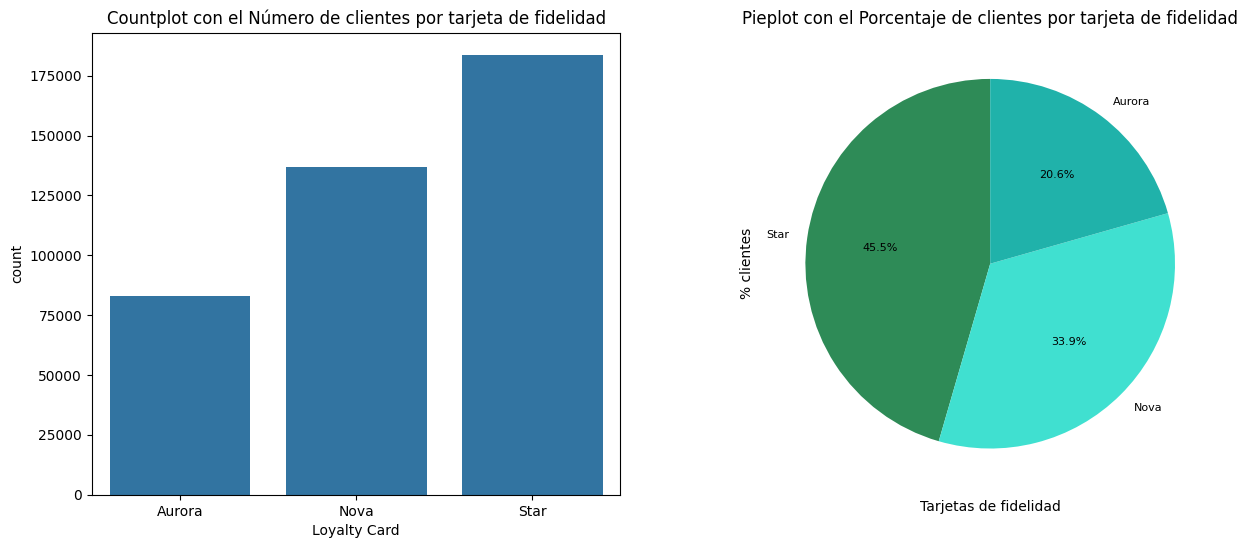

In [28]:
# para visualizarlo mejor voy a usar un Countplot y un Pieplot:

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

sns.countplot(data=df, x='Loyalty Card', ax=axes[0])
axes[0].set_title('Countplot con el Número de clientes por tarjeta de fidelidad')


colores = ["seagreen", "turquoise", "lightseagreen"]
plt.pie('proportion', labels= 'Loyalty Card', data = df_tarjeta, autopct=  '%1.1f%%', colors = colores, textprops={'fontsize': 8}, startangle=90)
plt.xlabel("Tarjetas de fidelidad")
plt.ylabel("% clientes")
plt.title('Pieplot con el Porcentaje de clientes por tarjeta de fidelidad', fontsize=12)


5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Como podemos ver, tenemos 3 tipos de tarjetas de fidelidad:

- Aurora: con 83.132 clientes, es un 20,59% del total

- Nova: con 136.883 clientes, tiene un 33,90% del total

- Star: con 183.745 clientes, es un 45,51% del total

No hay clientes sin tarjeta de fidelidad, por lo que estos porcentajes son proporciones respecto al total de clientes. 

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [29]:
# necesitaré las columnas "Marital Status" y "Gender":
df['Marital Status'].value_counts()
# 'Marital status' tiene 3 valores: (no hay nulos)

Marital Status
Married     234845
Single      108153
Divorced     60762
Name: count, dtype: int64

In [30]:
df['Gender'].value_counts()
# 'Gender' tiene 2 valores: (no hay nulos)

Gender
Female    202757
Male      201003
Name: count, dtype: int64

In [31]:
# con un groupby, un count y 'Loyalty Number' saco el número de clientes que hay por género y estado civil:
df.groupby(['Marital Status', 'Gender'])['Loyalty Number'].count().reset_index()

,Marital Status,Gender,Loyalty Number
0,Divorced,Female,30634
1,Divorced,Male,30128
2,Married,Female,117363
3,Married,Male,117482
4,Single,Female,54760
5,Single,Male,53393


In [32]:
# lo paso a df y saco los porcentajes:
df_género_estado_civil = df.groupby(['Marital Status', 'Gender'])['Loyalty Number'].count().reset_index(name='Recuento')

In [33]:
# saco un df_total con la suma de los recuentos
df_total =df_género_estado_civil['Recuento'].sum()

In [34]:
# que me da el número total de filas
df_total

np.int64(403760)

In [35]:
# el porcentaje será = (recuento/total)*100
df_género_estado_civil['Porcentaje'] = (df_género_estado_civil['Recuento']/df_total)*100

In [36]:
df_género_estado_civil['Porcentaje'] 

0     7.587181
1     7.461859
2    29.067515
3    29.096988
4    13.562512
5    13.223945
Name: Porcentaje, dtype: float64

In [37]:
# redondeo:
df_género_estado_civil['Porcentaje'] = round(df_género_estado_civil['Porcentaje'], 2)

In [38]:
df_género_estado_civil['Porcentaje']

0     7.59
1     7.46
2    29.07
3    29.10
4    13.56
5    13.22
Name: Porcentaje, dtype: float64

In [39]:
# el df para poder usarlo en el Pieplot:
df_género_estado_civil

,Marital Status,Gender,Recuento,Porcentaje
0,Divorced,Female,30634,7.59
1,Divorced,Male,30128,7.46
2,Married,Female,117363,29.07
3,Married,Male,117482,29.10
4,Single,Female,54760,13.56
5,Single,Male,53393,13.22


Text(0.5, 1.0, 'Pieplot con la Distribución de clientes según su estado civil y género')

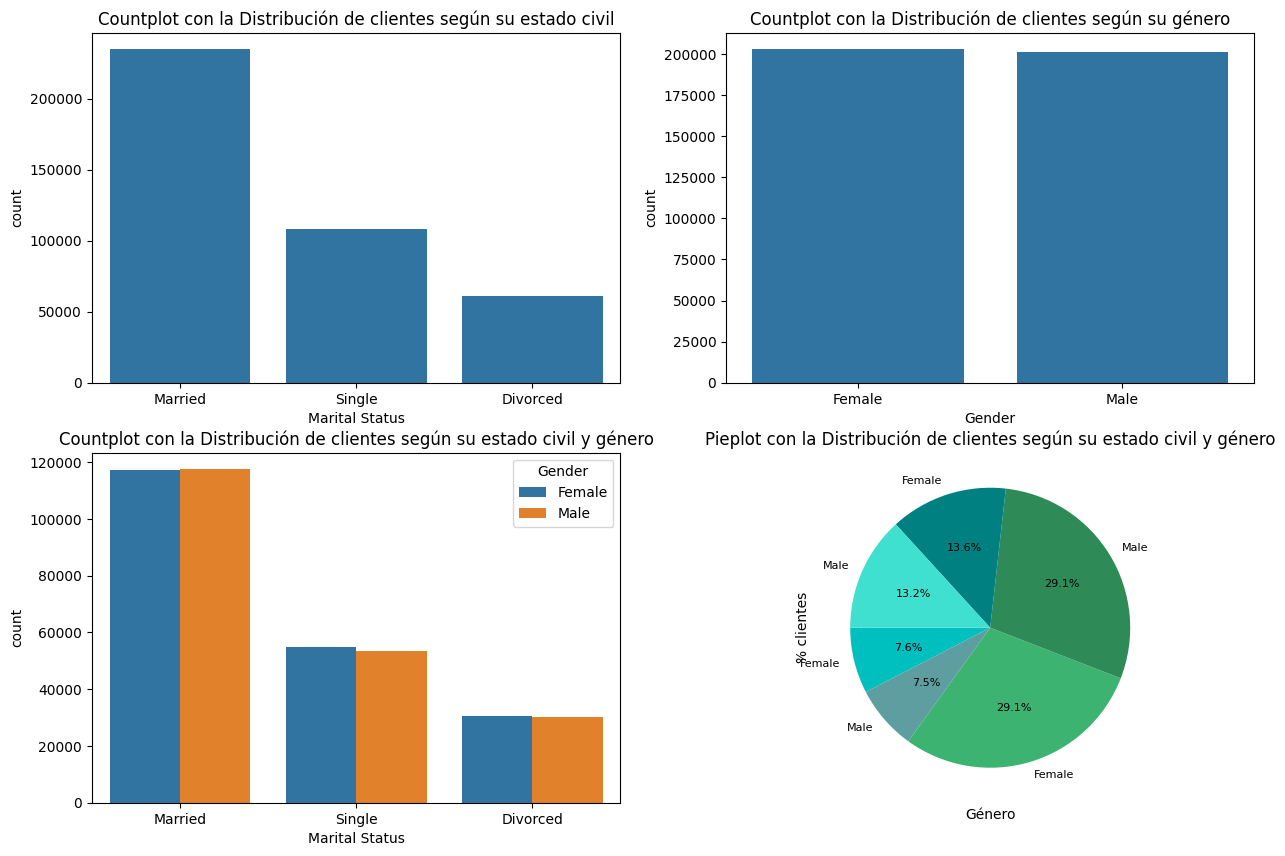

In [40]:
# para visualizarlo mejor voy a usar un Countplot y un Barplot:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

sns.countplot(data=df, x='Marital Status', ax=axes[0,0])
axes[0,0].set_title('Countplot con la Distribución de clientes según su estado civil')

sns.countplot(data=df, x='Gender', ax=axes[0,1])
axes[0,1].set_title('Countplot con la Distribución de clientes según su género')

sns.countplot(data=df, x='Marital Status', hue='Gender', ax=axes[1,0])
axes[1,0].set_title('Countplot con la Distribución de clientes según su estado civil y género')


colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]
plt.pie('Porcentaje', labels= 'Gender', data = df_género_estado_civil, autopct=  '%1.1f%%', colors = colores, textprops={'fontsize': 8}, startangle=180)
plt.xlabel("Género")
plt.ylabel("% clientes")
plt.title('Pieplot con la Distribución de clientes según su estado civil y género', fontsize=12)

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

He sacado 4 gráficas para ver mejor los datos de género y estado civil:

- En el Countplot con la Distribución de clientes según su estado civil: podemos ver que tenemos 3 categorías:

   - Married: con 234.845 clientes (58,17%)
   - Single: con 108.153 clientes (26,79%)
   - Divorced: con 60.762 clientes (15,04%)

- En el Countplot con la Distribución de clientes según su género: podemos ver que tenemos 2 categorías:

   - Female: con 202.757 clientas (50,22%)
   - Male: con 201.003 clientes (49,78%)

Según los datos, veo que 'Female' y 'Male' son prácticamente iguales respecto a su estado civil:

   - Married: tiene un total de 58,17%, siendo un 29.07% de 'Female' y un 29.10% de 'Male'
   - Single: tiene un total de 26,78%, siendo un 13.56% de 'Female' y un 13.22% de 'Male'
   - Divorced: tiene un total de 15,05%, siendo un 7.59% de 'Female' y un 7.46% de 'Male'
